# Feature Engineering

Life Cycle of Data Science
1) Data collection -> From company side,3rd party APi's,Surveys,
2) Feature Engineering -> Handling Missing values

Why are there missing values?
1. People hesitate to put down the information
2. Survey Informations are not that valid
3. Men wont disclose salary
4. Women wont disclose age
5. People may have died -- NAN

For Data science projects ,data should be collected from multiple sources

1. Missing Completely at Random(MCAR) 

IF the probability of being missed is the sasme for all observations. 
When data is MCAR ,there is no absolutely relationship between the data missing and any other values,observerd or missing within the dataset.

In other words,those missing data points are a random subset of data.

In [6]:
import pandas as pd
data=pd.read_csv('Datasets/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2.Missing data not at random(MNAR): Systematic missing values
    There is absolutely some relationship between the data missing and any other values ,observed or missing,within the dataset.
    

In [21]:
import numpy as np
data['cabin_null']=np.where(data['Cabin'].isnull(),1,0)
data['cabin_null'].head()

0    1
1    0
2    1
3    0
4    1
Name: cabin_null, dtype: int32

In [23]:
#FInd the percentage of Null values
data['cabin_null'].mean()

0.7710437710437711

In [25]:
data.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

# 3. Missing at Random (MAR)

All techniques of handling missing values

1. Mean/Median/Mode Replacement
2. Random Sample imputation
3. Capturing NAN values with a new feature
4. End of distribution imputation
5. Arbitrary imputation
6. Frequent categeries imputation

In [27]:
# Mean/Mode/median Replacement
# When do we apply?
# When data is missing completely at random(MCAR).and we replace NAN values woth the most frequent occurance of variables.
data[['Age','Fare','Survived']].head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [30]:
data[['Age','Fare','Survived']].isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [31]:
def impute_nan(df,feature,median):
    df[feature+"_median"]=df[feature].fillna(median)

In [34]:
impute_nan(data,'Age',data['Age'].median())
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0


In [37]:
#Check if standard deviation of AGe and Age_median columns change?

print(data['Age'].std())
print(data['Age_median'].std())

14.526497332334042
13.019696550973201


In [39]:
#Check the AGe distribution
import matplotlib.pyplot as plt
%matplotlib inline

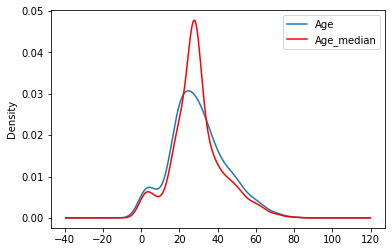

In [104]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['Age'].plot(kind='kde',ax=ax)
data['Age_median'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#Since we replaced NAN with median, in red line the curve gone high bcoz of median values 
# Advantages and Disadvantages of mean/median/mode imputation
#Advantages
1. Easy to implement (Robust to outliers)
2. Faster way to obtain the complete dataset

#Disadvantages
1. Change or Distrotion in the original variance
2. Impacts the correlation

# Random Sampling

In [44]:
df=pd.read_csv('Datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [84]:
print(df['Age'].isnull().sum())
#df['Age'].dropna().sample()

#sss=pd.DataFrame([1,4,6,5,8,np.nan,9,np.nan])
#print(sss.isnull().sum())
#print(sss.dropna().sample(sss.isnull().sum(),random_state=0))

# Replace NAN values with random samples.
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

177


423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [92]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    #Fill Null values with random samples
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #Data set should have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [112]:
impute_nan(df,'Age',df.Age.median)
df['Age_median'].isnull().sum()
#df['Age_median']=df['Age_median'].astype(float)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22,22.0
1,1,38.0,71.2833,38,38.0
2,1,26.0,7.9250,26,26.0
3,1,35.0,53.1000,35,35.0
4,0,35.0,8.0500,35,35.0


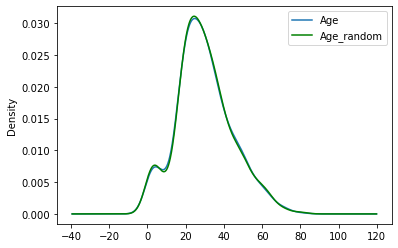

In [114]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
#df['Age_median'].astype(float)
#df['Age_median'].plot(kind='kde',ax=ax,color='red')
df['Age_random'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# Both Age and Age_random are following the same distribution ,whereas above Age and and Age_median are not following 
#the same distributon


#Advantages
1. Easy to implement
2. There is less distortion in variance

#Disadvantages
1. Every situation randomness wont work

# 3. Capturing NAN values with a new feature

In [213]:
df=pd.read_csv('Datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
Survived    891 non-null int64
Age         714 non-null float64
Fare        891 non-null float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [120]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [214]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
Survived    891 non-null int64
Age         891 non-null float64
Fare        891 non-null float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


#Advantages
1. Easy to implmenet
2. Captures the importance of missing values.

#Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

# 4. End of Distribution

In [215]:
df=pd.read_csv('Datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
Survived    891 non-null int64
Age         714 non-null float64
Fare        891 non-null float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


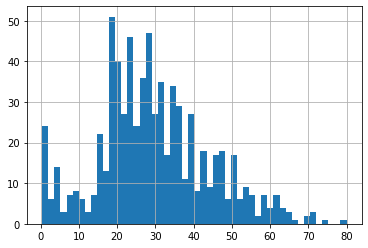

In [160]:
df.Age.hist(bins=50)

In [220]:
#Take 3std from the mean , from above historgram
extreme=df.Age.mean()+3*df.Age.std()
print(extreme)

TypeError: unsupported operand type(s) for +: 'float' and 'method'

In [217]:
def impute_NAN(df,variable,median,extreme):
    df[variable+"_end_of_distribution"]=df[variable].fillna(median)
    df[variable].fillna(median,inplace=True)

In [219]:
impute_NAN(df,'Age',df.Age.median,extreme)
df.head()
df.info()

TypeError: float() argument must be a string or a number, not 'method'

In [172]:
df.head()

,Survived,Age,Fare,Age_end_of_distribution
0,0,22,7.2500,22
1,1,38,71.2833,38
2,1,26,7.9250,26
3,1,35,53.1000,35
4,0,35,8.0500,35


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Survived                   891 non-null int64
Age                        891 non-null object
Fare                       891 non-null float64
Age_end_of_distribution    891 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB


In [212]:
#df["Age"] = df["Age"].convert_objects(convert_numeric=True)
#df.Age.convert_objects(convert_numeric=True)
#pd.to_numeric(df.Age, downcast='float')
#df['Age'] = pd.to_numeric(df['Age'],errors=coe='float')
age=df.Age
age=list(age)
age=[float(i) for i in age]

type(age)
df['Age_new']=age
df.info()

TypeError: float() argument must be a string or a number, not 'method'

In [221]:
pd.to_numeric(age)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

# 5. Arbitrary value imputation

Replacing NAN by an arbitrary values. Not heavily used

In [224]:
import pandas as pd
df=pd.read_csv('Datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [226]:
def impute_nan(df,variable):
    df[variable+"_zero"]=df[variable].fillna(0)
    df[variable+"_hundred"]=df[variable].fillna(100)

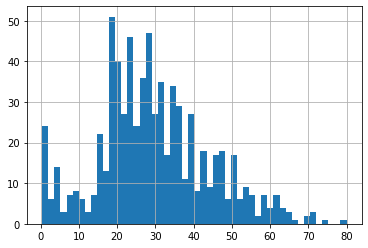

In [229]:
df['Age'].hist(bins=50)